Applies models to all feeders

In [1]:
from pathlib import Path

import numpy as np
import time
import pickle
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style = "whitegrid")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman']
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn import set_config
set_config(transform_output = "pandas")

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.model_selection import RepeatedKFold

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error
rmse_scorer = make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared = False), greater_is_better=False)

from sklearn.linear_model import (
    HuberRegressor,
    LinearRegression,
    RANSACRegressor,
    TheilSenRegressor,
)

In [2]:
base_path = Path.cwd()
print(f"{base_path=}")

base_path=PosixPath('/home/epalacios-garcia/Documents/Code/modelfreeLV')


In [3]:
Feed_names = ['1 1', '1 2', '1 3', '1 4', '2 1', '2 2', '2 3', '2 4', '2 5', '3 1', '3 2', '3 3', '3 4', '3 5', '3 6', '4 1', '4 2', '4 3', '4 4', '4 5', '4 6', '5 1', '5 2', '5 3', '5 4', '5 5', '5 6', '5 7', '5 8', '6 1', '6 2', '7 1', '7 2', '7 3', '7 4', '7 5', '7 6', '7 7', '8 1', '8 2', '9 1', '9 2', '9 3', '9 4', '9 5', '9 6', '10 1', '10 2', '10 3', '10 4', '10 5', '10 6', '11 1', '11 2', '11 3', '11 4', '11 5', '12 1', '12 2', '12 3', '13 1', '13 2', '13 3', '13 4', '14 1', '14 2', '14 3', '14 4', '14 5', '14 6', '15 1', '15 2', '15 3', '15 4', '15 5', '15 6', '15 7', '16 1', '16 2', '16 3', '16 4', '17 1', '17 2', '17 3', '17 4', '17 5', '17 6', '17 7', '18 1', '18 2', '18 3', '18 4', '18 5', '18 6', '18 7', '18 8', '18 9', '19 1', '19 2', '19 3', '19 4', '19 5', '20 1', '20 2', '20 3', '20 4', '20 5', '21 1', '21 2', '21 3', '21 4', '21 5', '22 1', '22 2', '22 3', '22 4', '22 5', '22 6', '23 1', '23 2', '23 3', '23 4', '23 5', '24 1', '24 2', '25 1', '25 2', '25 3']

In [4]:
Feed_names.index("17 7")

87

# Training

In [5]:
Train = False

In [6]:
if Train:
    regressor = TransformedTargetRegressor(
        regressor = linear_model.LinearRegression(),
        transformer = StandardScaler(with_mean = True, with_std = True)
        )
    #
    #("preprocess_cs",StandardScaler(with_mean = True, with_std = True)),
    #("preprocess_tr",PowerTransformer(method = "yeo-johnson")),
    pipeline = Pipeline(
        steps = [
            ("preprocess_cs",StandardScaler(with_mean = True, with_std = True)),
            ("target_transform", regressor)
        ])


In [7]:
if Train:
    count = 0
    for net in range(1,27):
        feed = 0
        while True:
            feed +=1
            start_time = time.time()
            #Load datasets
            try:
                # 10% data
                path_10_simulation = base_path.joinpath("Simulation_Results_10")
                with open(path_10_simulation.joinpath(f"Loads_Network_{net}_Feeder_{feed}.npy"), 'rb') as f:
                    Dataset_10 = np.load(f, allow_pickle = True)
                with open(path_10_simulation.joinpath(f"Targets_Network_{net}_Feeder_{feed}.npy"), "rb") as f:
                    Targets_10 = np.load(f, allow_pickle = True)
                # 30% data
                path_30_simulation = base_path.joinpath("Simulation_Results_30")
                with open(path_30_simulation.joinpath(f"Loads_Network_{net}_Feeder_{feed}.npy"), 'rb') as f:
                    Dataset_30 = np.load(f, allow_pickle = True)
                with open(path_30_simulation.joinpath(f"Targets_Network_{net}_Feeder_{feed}.npy"), "rb") as f:
                    Targets_30 = np.load(f, allow_pickle = True)
                # 50% data
                path_50_simulation = base_path.joinpath("Simulation_Results_50")
                with open(path_50_simulation.joinpath(f"Loads_Network_{net}_Feeder_{feed}.npy"), 'rb') as f:
                    Dataset_50 = np.load(f, allow_pickle = True)
                with open(path_50_simulation.joinpath(f"Targets_Network_{net}_Feeder_{feed}.npy"), "rb") as f:
                    Targets_50 = np.load(f, allow_pickle = True)
                # 70% data
                path_70_simulation = base_path.joinpath("Simulation_Results_70")
                with open(path_70_simulation.joinpath(f"Loads_Network_{net}_Feeder_{feed}.npy"), 'rb') as f:
                    Dataset_70 = np.load(f, allow_pickle = True)
                with open(path_70_simulation.joinpath(f"Targets_Network_{net}_Feeder_{feed}.npy"), "rb") as f:
                    Targets_70 = np.load(f, allow_pickle = True)
                # 100% data
                path_100_simulation = base_path.joinpath("Simulation_Results_100")
                with open(path_100_simulation.joinpath(f"Loads_Network_{net}_Feeder_{feed}.npy"), 'rb') as f:
                    Dataset_100 = np.load(f, allow_pickle = True)
                with open(path_100_simulation.joinpath(f"Targets_Network_{net}_Feeder_{feed}.npy"), "rb") as f:
                    Targets_100 = np.load(f, allow_pickle = True)
            except:
                break
            print(net, feed)
            count += 1
            # hyper parameter selection
            #linear -> none
            # train on 70% and test on 30
            X_train, X_test, y_train, y_test = train_test_split(Dataset_10, 230*Targets_10, test_size=0.3, shuffle = False)
            #linear model
            print("linear ", end = "")

            pipeline.fit(X_train, y_train)
            preds_linear_10 = pipeline.predict(X_test)
            preds_linear_30 = pipeline.predict(Dataset_30)
            preds_linear_50 = pipeline.predict(Dataset_50)
            preds_linear_70 = pipeline.predict(Dataset_70)
            preds_linear_100 = pipeline.predict(Dataset_100)
            results_linear_dict = {
                'Observed_10': y_test,
                'Predicted_10': preds_linear_10,
                'Error_10': preds_linear_10-y_test,
                'Observed_30': 230*Targets_30,
                'Predicted_30': preds_linear_30,
                'Error_30': preds_linear_30-230*Targets_30,
                'Observed_50': 230*Targets_50,
                'Predicted_50': preds_linear_50,
                'Error_50': preds_linear_50-230*Targets_50,
                'Observed_70': 230*Targets_70,
                'Predicted_70': preds_linear_70,
                'Error_70': preds_linear_70-230*Targets_70,
                'Observed_100': 230*Targets_100,
                'Predicted_100': preds_linear_100,
                'Error_100': preds_linear_100-230*Targets_100
            }

            ## Neural Network

            pipeline.set_params(target_transform__regressor = MLPRegressor())

            param_grid = {
            'target_transform__regressor__learning_rate_init': np.linspace(0.001, 0.1, 20),
            'target_transform__regressor__alpha': np.linspace(0.00001, 0.001, 20),
            'target_transform__regressor__hidden_layer_sizes': [[25,], [50,],[100,],[150,]]   
            }

            print("NN params ", end = "")
            grid_search_nn = GridSearchCV(pipeline, param_grid, cv=RepeatedKFold(n_splits=5, n_repeats=2), scoring=rmse_scorer, n_jobs=-1)
            grid_search_nn.fit(X_train, y_train)

            NN_optimal_params = grid_search_nn.best_params_

            print("NN train ", end = "")
            pipeline.set_params(target_transform__regressor__alpha = NN_optimal_params["target_transform__regressor__alpha"])
            pipeline.set_params(target_transform__regressor__hidden_layer_sizes = NN_optimal_params["target_transform__regressor__hidden_layer_sizes"])
            pipeline.set_params(target_transform__regressor__learning_rate_init = NN_optimal_params["target_transform__regressor__learning_rate_init"])
            pipeline.fit(X_train, y_train)

            preds_nn_10 = pipeline.predict(X_test)
            preds_nn_30 = pipeline.predict(Dataset_30)
            preds_nn_50 = pipeline.predict(Dataset_50)
            preds_nn_70 = pipeline.predict(Dataset_70)
            preds_nn_100 = pipeline.predict(Dataset_100)
            results_NN_dict = {
                'Observed_10': y_test,
                'Predicted_10': preds_nn_10,
                'Error_10': preds_nn_10-y_test,
                'Observed_30': 230*Targets_30,
                'Predicted_30': preds_nn_30,
                'Error_30': preds_nn_30-230*Targets_30,
                'Observed_50': 230*Targets_50,
                'Predicted_50': preds_nn_50,
                'Error_50': preds_nn_50-230*Targets_50,
                'Observed_70': 230*Targets_70,
                'Predicted_70': preds_nn_70,
                'Error_70': preds_nn_70-230*Targets_70,
                'Observed_100': 230*Targets_100,
                'Predicted_100': preds_nn_100,
                'Error_100': preds_nn_100-230*Targets_100
            }


            with open(base_path.joinpath("Models").joinpath("Results").joinpath(f"Network_{net}_Feeder_{feed}_linear_results.pkl"), 'wb') as file:
                pickle.dump(results_linear_dict, file)

            with open(base_path.joinpath("Models").joinpath("Results").joinpath(f"Network_{net}_Feeder_{feed}_NN_results.pkl"), 'wb') as file:
                pickle.dump(results_NN_dict, file)

            end_time = time.time()
            print("Took: ", end_time-start_time, " est. rem (mins): ", (128-count)*(end_time-start_time)/60)

# Analysis

In [8]:
data_list = []
for net in range(1,27):
    feed = 0
    while True:
        feed +=1
        #Load datasets
        try:
            with open(base_path.joinpath("Models").joinpath("Results").joinpath(f"Network_{net}_Feeder_{feed}_linear_results.pkl"), 'rb') as file:
                loaded_results_linear_dict = pickle.load(file)
            data_list.append(loaded_results_linear_dict)
        except:
            break

In [9]:
data_list_nn = []
for net in range(1,27):
    feed = 0
    while True:
        feed +=1
        #Load datasets
        try:
            with open(base_path.joinpath("Models").joinpath("Results").joinpath(f"Network_{net}_Feeder_{feed}_NN_results.pkl"), 'rb') as file:
                loaded_results_nn_dict = pickle.load(file)
            data_list_nn.append(loaded_results_nn_dict)
        except:
            break

In [10]:
plt.rcParams.update({'font.size': 8})

## Voltages

/tmp/ipykernel_100237/3377280585.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90, fontsize=5)
/tmp/ipykernel_100237/3377280585.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90, fontsize=5)


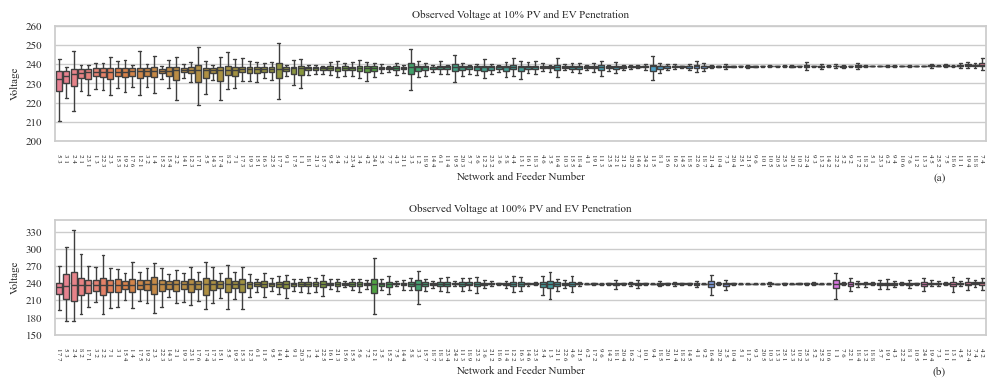

In [11]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 4))


all_errors_df = pd.concat([abs(pd.DataFrame(data["Observed_10"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[0], data = all_errors_df, showfliers=False, linewidth = 1)

all_errors_df = pd.concat([abs(pd.DataFrame(data["Observed_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[1], data = all_errors_df, showfliers=False, linewidth = 1)


axes[0].set_xlabel("Network and Feeder Number", fontsize = 8)
axes[1].set_xlabel("Network and Feeder Number", fontsize = 8)

axes[0].set_ylabel("Voltage", fontsize = 8)
axes[1].set_ylabel("Voltage", fontsize = 8)

axes[0].set_ylim(200,260)
axes[1].set_ylim(150,350)

axes[0].set_title("Observed Voltage at 10% PV and EV Penetration", fontsize = 8)
axes[1].set_title("Observed Voltage at 100% PV and EV Penetration", fontsize = 8)

axes[0].text(0.95, -0.35, '(a)', ha='center', transform=axes[0].transAxes)
axes[1].text(0.95, -0.35, '(b)', ha='center', transform=axes[1].transAxes)

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90, fontsize=5)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90, fontsize=5) 

axes[0].set_yticks(np.arange(200, 270, 10), np.arange(200, 270, 10), fontsize=8)
axes[1].set_yticks(np.arange(150, 360, 30), np.arange(150, 360, 30),  fontsize=8)

plt.tight_layout()
plt.savefig("Images/observed_voltage_feeder_distribution.svg")

/tmp/ipykernel_100237/68426411.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90, fontsize=5)
/tmp/ipykernel_100237/68426411.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90, fontsize=5)


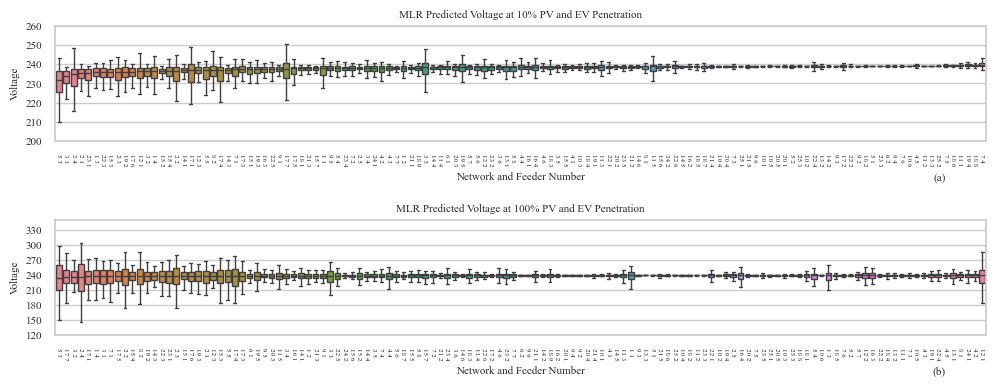

In [12]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 4))


all_errors_df = pd.concat([abs(pd.DataFrame(data["Predicted_10"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[0], data = all_errors_df, showfliers=False, linewidth = 1)

all_errors_df = pd.concat([abs(pd.DataFrame(data["Predicted_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[1], data = all_errors_df, showfliers=False, linewidth = 1)


axes[0].set_xlabel("Network and Feeder Number", fontsize = 8)
axes[1].set_xlabel("Network and Feeder Number", fontsize = 8)

axes[0].set_ylabel("Voltage", fontsize = 8)
axes[1].set_ylabel("Voltage", fontsize = 8)

axes[0].set_ylim(200,260)
axes[1].set_ylim(120,350)

axes[0].set_title("MLR Predicted Voltage at 10% PV and EV Penetration", fontsize = 8)
axes[1].set_title("MLR Predicted Voltage at 100% PV and EV Penetration", fontsize = 8)

axes[0].text(0.95, -0.35, '(a)', ha='center', transform=axes[0].transAxes)
axes[1].text(0.95, -0.35, '(b)', ha='center', transform=axes[1].transAxes)

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90, fontsize=5)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90, fontsize=5) 

axes[0].set_yticks(np.arange(200, 270, 10), np.arange(200, 270, 10), fontsize=8)
axes[1].set_yticks(np.arange(120, 360, 30), np.arange(120, 360, 30),  fontsize=8)

plt.tight_layout()
plt.savefig("Images/mlr_predicted_voltage_feeder_distribution.svg")

/tmp/ipykernel_100237/1599624692.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90, fontsize=5)
/tmp/ipykernel_100237/1599624692.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90, fontsize=5)


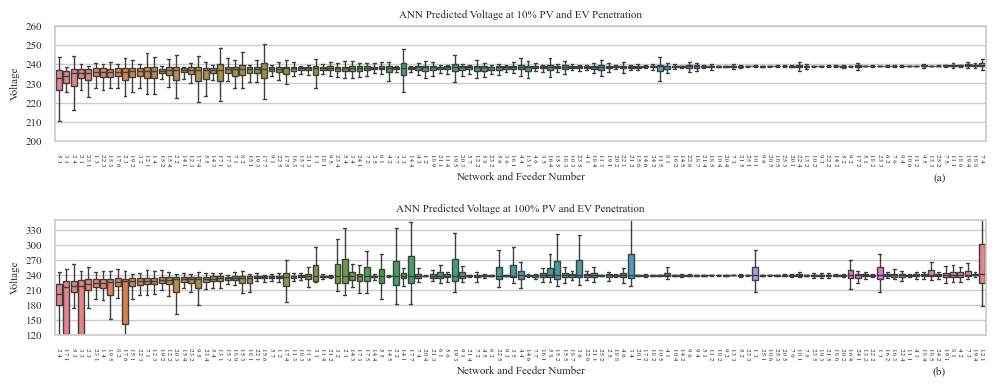

In [13]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 4))


all_errors_df = pd.concat([abs(pd.DataFrame(data["Predicted_10"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[0], data = all_errors_df, showfliers=False, linewidth = 1)

all_errors_df = pd.concat([abs(pd.DataFrame(data["Predicted_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[1], data = all_errors_df, showfliers=False, linewidth = 1)


axes[0].set_xlabel("Network and Feeder Number", fontsize = 8)
axes[1].set_xlabel("Network and Feeder Number", fontsize = 8)

axes[0].set_ylabel("Voltage", fontsize = 8)
axes[1].set_ylabel("Voltage", fontsize = 8)

axes[0].set_ylim(210,260)
axes[1].set_ylim(120,350)

axes[0].set_title("ANN Predicted Voltage at 10% PV and EV Penetration", fontsize = 8)
axes[1].set_title("ANN Predicted Voltage at 100% PV and EV Penetration", fontsize = 8)

axes[0].text(0.95, -0.35, '(a)', ha='center', transform=axes[0].transAxes)
axes[1].text(0.95, -0.35, '(b)', ha='center', transform=axes[1].transAxes)

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90, fontsize=5)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90, fontsize=5) 

axes[0].set_yticks(np.arange(200, 270, 10), np.arange(200, 270, 10), fontsize=8)
axes[1].set_yticks(np.arange(120, 360, 30), np.arange(120, 360, 30),  fontsize=8)

plt.tight_layout()
plt.savefig("Images/nn_predicted_voltage_feeder_distribution.svg")

### Example Feeder

In [14]:
voltages_10 = pd.concat([abs(pd.DataFrame(data["Observed_10"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
voltages_100 = pd.concat([abs(pd.DataFrame(data["Observed_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
voltages_10_pred_mlr = pd.concat([abs(pd.DataFrame(data["Predicted_10"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
voltages_100_pred_mlr = pd.concat([abs(pd.DataFrame(data["Predicted_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
voltages_10_pred_nn = pd.concat([abs(pd.DataFrame(data["Predicted_10"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)
voltages_100_pred_nn = pd.concat([abs(pd.DataFrame(data["Predicted_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)

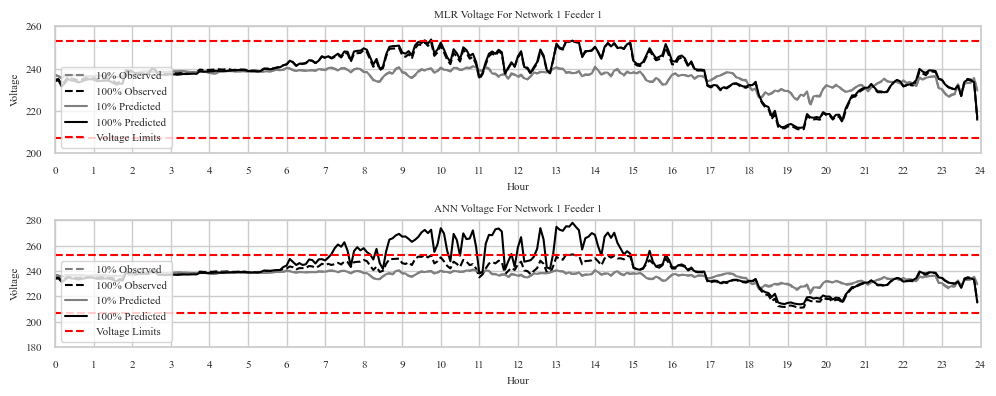

In [15]:
fig, ax = plt.subplots(2,1, figsize = (10,4))
sns.lineplot(ax = ax[0], data=voltages_10["1 1"].values[:288], label = "10% Observed", linestyle="--", color="grey")
sns.lineplot(ax = ax[0], data=voltages_100["1 1"].values[:288], label = "100% Observed", linestyle="--", color="black")

sns.lineplot(ax = ax[0], data=voltages_10_pred_mlr["1 1"].values[:288], label = "10% Predicted", color="grey")
sns.lineplot(ax = ax[0], data=voltages_100_pred_mlr["1 1"].values[:288], label = "100% Predicted", color="black")

ax[0].axhline(230*1.1, linestyle = "--", color = "red", label = "Voltage Limits")
ax[0].axhline(230*0.9, linestyle = "--", color = "red")

ax[0].set_title("MLR Voltage For Network 1 Feeder 1", fontsize=8)
ax[0].set_xlabel("Hour", fontsize=8)
ax[0].set_ylabel("Voltage", fontsize=8)
ax[0].set_xlim(0, 288)
ax[0].set_ylim(200, 260)
ax[0].set_yticks(np.arange(200,270,20),np.arange(200,270,20),fontsize=8)
ax[0].set_xticks(np.arange(0,300,12), np.arange(0,25,1), fontsize=8)
ax[0].legend(fontsize=8, loc = "lower left")

sns.lineplot(ax = ax[1], data=voltages_10["1 1"].values[:288], label = "10% Observed", linestyle="--", color="grey")
sns.lineplot(ax = ax[1], data=voltages_100["1 1"].values[:288], label = "100% Observed", linestyle="--", color="black")

sns.lineplot(ax = ax[1], data=voltages_10_pred_nn["1 1"].values[:288], label = "10% Predicted", color="grey")
sns.lineplot(ax = ax[1], data=voltages_100_pred_nn["1 1"].values[:288], label = "100% Predicted", color="black")

ax[1].axhline(230*1.1, linestyle = "--", color = "red", label = "Voltage Limits")
ax[1].axhline(230*0.9, linestyle = "--", color = "red")

ax[1].set_title("ANN Voltage For Network 1 Feeder 1", fontsize=8)
ax[1].set_xlabel("Hour", fontsize=8)
ax[1].set_ylabel("Voltage", fontsize=8)
ax[1].set_xlim(0, 288)
ax[1].set_ylim(180, 280)
ax[1].set_yticks(np.arange(180,290,20),np.arange(180,290,20),fontsize=8)
ax[1].set_xticks(np.arange(0,300,12), np.arange(0,25,1), fontsize=8)
ax[1].legend(fontsize=8, loc = "lower left")

plt.tight_layout()
plt.savefig("Images/pred_example_network_1_feeder_1.svg")

In [16]:
obs_df = pd.concat([abs(pd.DataFrame(data["Observed_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
pred_lin_df = pd.concat([abs(pd.DataFrame(data["Predicted_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
pred_nn_df = pd.concat([abs(pd.DataFrame(data["Predicted_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)

Error_NN = {}
Error_lin = {}

for coloumn in obs_df:
    Error_linear = []
    Error_nn = []
    for i in range(len(obs_df[coloumn])):
        if 207 < obs_df[coloumn][i] < 253:
            Error_linear.append(abs(obs_df[coloumn][i]-pred_lin_df[coloumn][i]))
            Error_nn.append(abs(obs_df[coloumn][i]-pred_nn_df[coloumn][i]))
    Error_NN[coloumn] = Error_nn
    Error_lin[coloumn] = Error_linear
        

In [17]:
len(list(Error_lin.keys())),len(list(Error_lin.values()))

(127, 127)

/tmp/ipykernel_100237/3977174683.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90, fontsize=8)
/tmp/ipykernel_100237/3977174683.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90, fontsize=8)
/tmp/ipykernel_100237/3977174683.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90, fontsize=5)
/tmp/ipykernel_100237/3977174683.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90, fontsize=5)


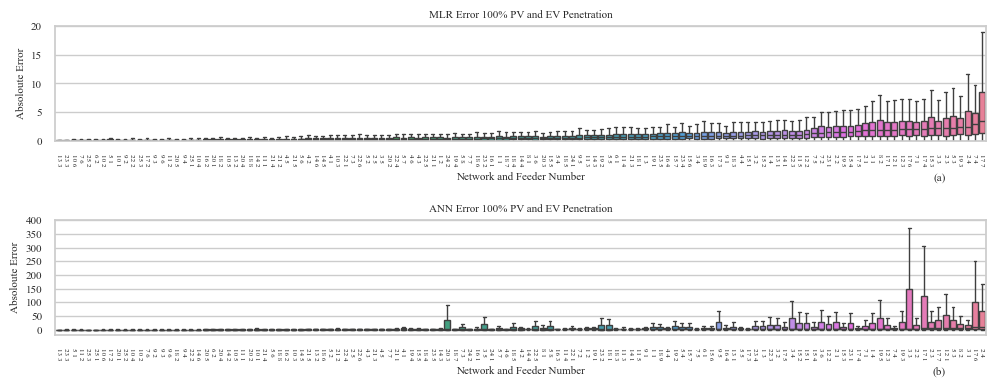

In [18]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 4))

all_errors_df_lin = pd.concat([abs(pd.DataFrame(data["Error_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
all_errors_df_lin = all_errors_df_lin.reindex(all_errors_df_lin.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[0], data = all_errors_df_lin, showfliers=False, linewidth = 1)
#axes[0].boxplot(list(Error_lin.values()), labels = list(Error_lin.keys()), showfliers=False)


all_errors_df_nn = pd.concat([abs(pd.DataFrame(data["Error_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)
all_errors_df_nn = all_errors_df_nn.reindex(all_errors_df_nn.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[1], data = all_errors_df_nn, showfliers=False, linewidth = 1)
#axes[1].boxplot(list(Error_NN.values()), labels = list(Error_NN.keys()), showfliers=False)

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90, fontsize=8)  
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90, fontsize=8)  


axes[0].set_xlabel("Network and Feeder Number", fontsize = 8)
axes[1].set_xlabel("Network and Feeder Number", fontsize = 8)

axes[0].set_ylabel("Absoloute Error", fontsize = 8)
axes[1].set_ylabel("Absoloute Error", fontsize = 8)

axes[0].set_ylim(0,20)
#axes[1].set_ylim(0,20)

axes[0].text(0.95, -0.35, '(a)', ha='center', transform=axes[0].transAxes)
axes[1].text(0.95, -0.35, '(b)', ha='center', transform=axes[1].transAxes)

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90, fontsize=5)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90, fontsize=5) 

ytick = range(0,25,5)
ytick_1 = range(0,450,50)

axes[0].set_yticks(ytick, ytick,fontsize=8)
axes[1].set_yticks(ytick_1, ytick_1, fontsize=8)

axes[0].set_title("MLR Error 100% PV and EV Penetration",fontsize=8)
axes[1].set_title("ANN Error 100% PV and EV Penetration",fontsize=8)

plt.tight_layout()
plt.savefig("Images/voltage_error_feeder_distribution.svg")

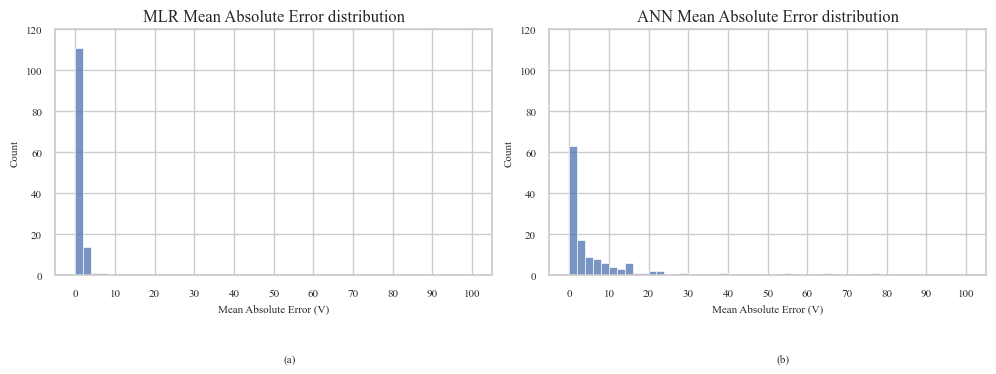

In [19]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
abcd = pd.DataFrame(data = [list(all_errors_df_lin.mean()), list(all_errors_df_nn.mean())], index = ["Linear", "Neural Network"]).T
sns.histplot(ax = axes[0], data = abcd["Linear"], bins=np.arange(0,101,2))
sns.histplot(ax = axes[1], data = abcd["Neural Network"], bins=np.arange(0,101,2))
axes[0].set_title("MLR Mean Absolute Error distribution")
axes[0].set_ylabel("Count", fontsize = 8)
axes[0].set_xlabel("Mean Absolute Error (V)", fontsize = 8)
axes[1].set_title("ANN Mean Absolute Error distribution")
axes[1].set_ylabel("Count", fontsize = 8)
axes[1].set_xlabel("Mean Absolute Error (V)", fontsize = 8)

axes[0].set_yticks(np.arange(0,121,20), np.arange(0,121,20),fontsize=8)
axes[1].set_yticks(np.arange(0,121,20), np.arange(0,121,20),fontsize=8)
axes[0].set_xticks(np.arange(0,101,10),np.arange(0,101,10),fontsize=8)
axes[1].set_xticks(np.arange(0,101,10), np.arange(0,101,10),fontsize=8)

axes[0].text(0.55, -0.34, '(a)', va='center', ha='right', transform=axes[0].transAxes, fontsize=8)
axes[1].text(0.55, -0.34, '(b)', va='center', ha='right', transform=axes[1].transAxes, fontsize=8)
plt.tight_layout()
plt.savefig("Images/mae_error_comparison.svg")

### MLR

/tmp/ipykernel_100237/324981208.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90, fontsize=8)
/tmp/ipykernel_100237/324981208.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90, fontsize=8)
/tmp/ipykernel_100237/324981208.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=-90, fontsize=8)
/tmp/ipykernel_100237/324981208.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=-90, fontsize=8)
/tmp/ipykernel_1

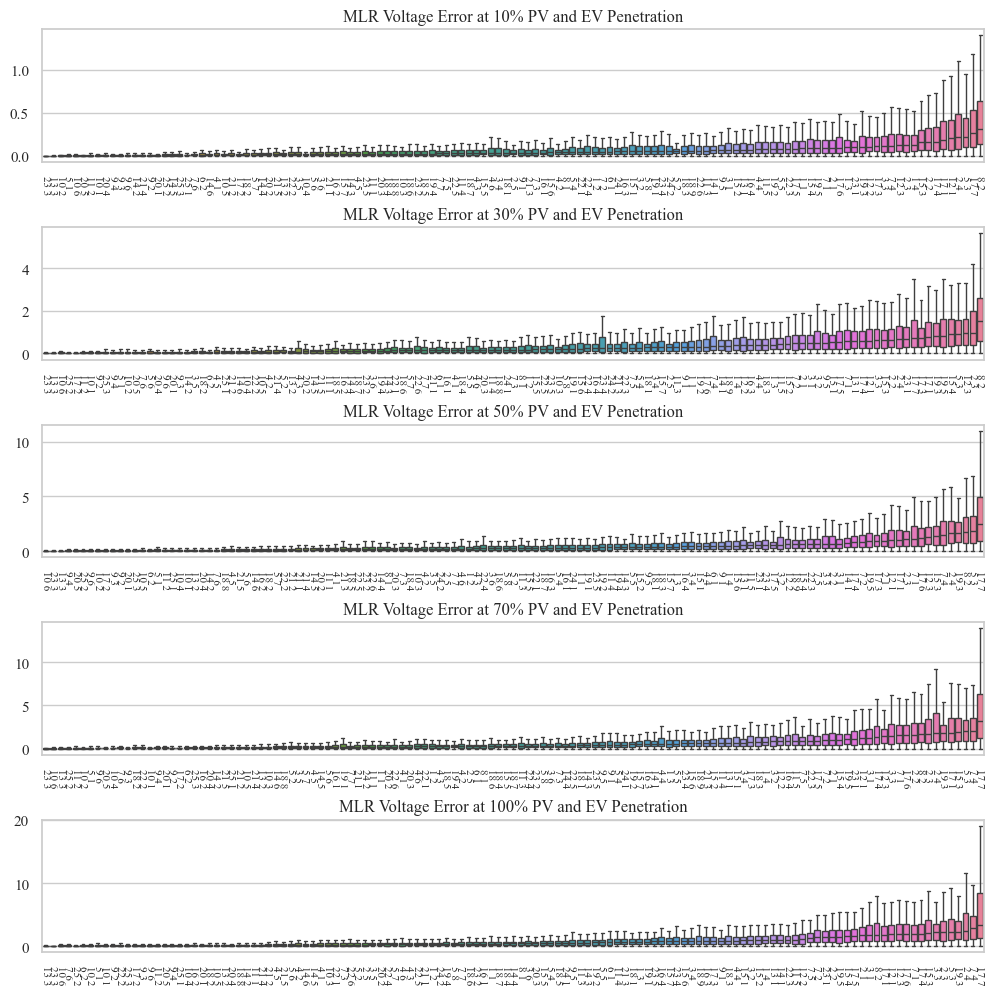

In [20]:
# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 10))

all_errors_df = pd.concat([abs(pd.DataFrame(data["Error_10"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[0], data = all_errors_df, showfliers=False)


all_errors_df = pd.concat([abs(pd.DataFrame(data["Error_30"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[1], data = all_errors_df, showfliers=False)


all_errors_df = pd.concat([abs(pd.DataFrame(data["Error_50"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[2], data = all_errors_df, showfliers=False)


all_errors_df = pd.concat([abs(pd.DataFrame(data["Error_70"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[3], data = all_errors_df, showfliers=False)


all_errors_df = pd.concat([abs(pd.DataFrame(data["Error_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[4], data = all_errors_df, showfliers=False)

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90, fontsize=8)  
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90, fontsize=8)  
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=-90, fontsize=8)  
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=-90, fontsize=8)  
axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation=-90, fontsize=8)   

axes[0].set_title("MLR Voltage Error at 10% PV and EV Penetration")
axes[1].set_title("MLR Voltage Error at 30% PV and EV Penetration")
axes[2].set_title("MLR Voltage Error at 50% PV and EV Penetration")
axes[3].set_title("MLR Voltage Error at 70% PV and EV Penetration")
axes[4].set_title("MLR Voltage Error at 100% PV and EV Penetration")

plt.tight_layout()


### NN

/tmp/ipykernel_100237/554110108.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90, fontsize=8)
/tmp/ipykernel_100237/554110108.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90, fontsize=8)
/tmp/ipykernel_100237/554110108.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=-90, fontsize=8)
/tmp/ipykernel_100237/554110108.py:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=-90, fontsize=8)
/tmp/ipykernel_1

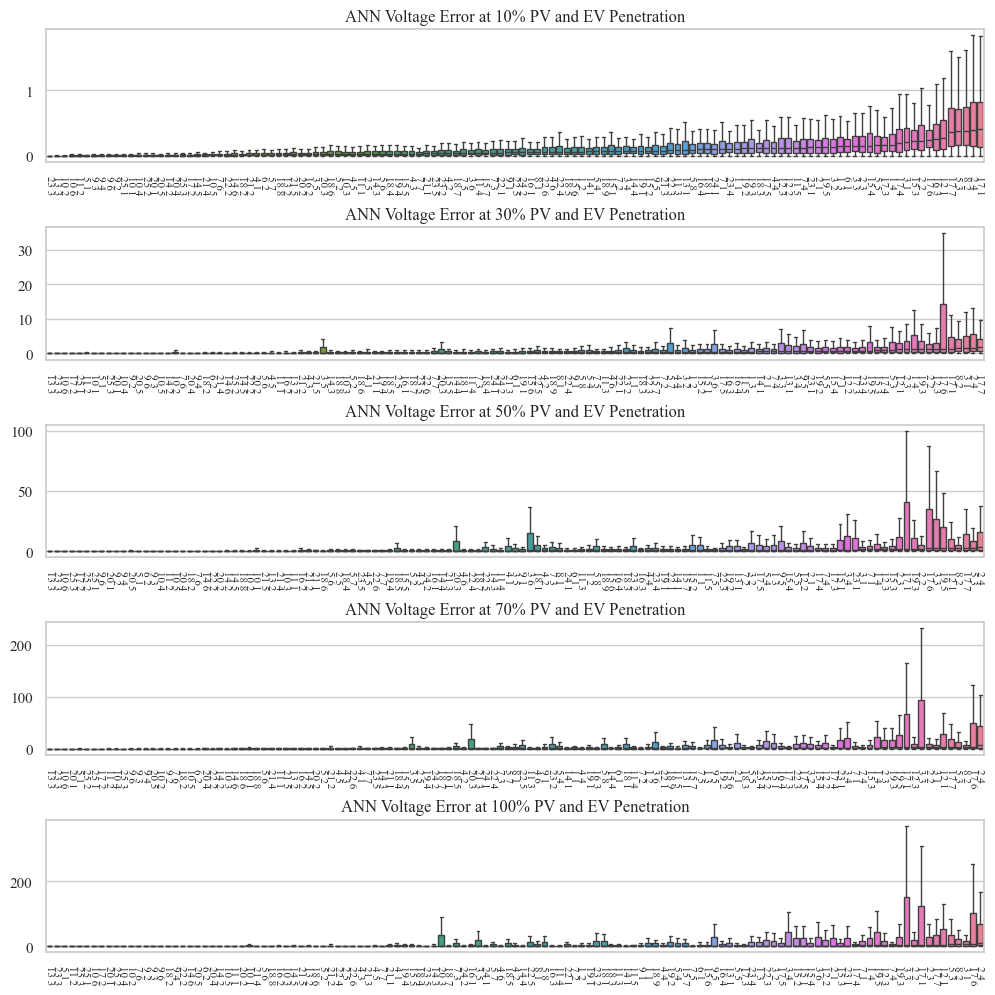

In [21]:
# Create subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 10))

all_errors_df = pd.concat([abs(pd.DataFrame(data["Error_10"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[0], data = all_errors_df, showfliers=False)


all_errors_df = pd.concat([abs(pd.DataFrame(data["Error_30"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[1], data = all_errors_df, showfliers=False)


all_errors_df = pd.concat([abs(pd.DataFrame(data["Error_50"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[2], data = all_errors_df, showfliers=False)


all_errors_df = pd.concat([abs(pd.DataFrame(data["Error_70"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[3], data = all_errors_df, showfliers=False)


all_errors_df = pd.concat([abs(pd.DataFrame(data["Error_100"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)
all_errors_df = all_errors_df.reindex(all_errors_df.median().sort_values().index, axis=1)
sns.boxplot(ax = axes[4], data = all_errors_df, showfliers=False)

axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=-90, fontsize=8)  
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=-90, fontsize=8)  
axes[2].set_xticklabels(axes[2].get_xticklabels(), rotation=-90, fontsize=8)  
axes[3].set_xticklabels(axes[3].get_xticklabels(), rotation=-90, fontsize=8)  
axes[4].set_xticklabels(axes[4].get_xticklabels(), rotation=-90, fontsize=8)   

axes[0].set_title("ANN Voltage Error at 10% PV and EV Penetration")
axes[1].set_title("ANN Voltage Error at 30% PV and EV Penetration")
axes[2].set_title("ANN Voltage Error at 50% PV and EV Penetration")
axes[3].set_title("ANN Voltage Error at 70% PV and EV Penetration")
axes[4].set_title("ANN Voltage Error at 100% PV and EV Penetration")

plt.tight_layout()

## Statistics

In [22]:
# Overall stats
for t in ["10", "30", "50", "70", "100"]:
    error_NN = pd.concat([abs(pd.DataFrame(data[f"Error_{t}"], columns=[Feed_names[i]])) for i, data in enumerate(data_list_nn)], axis=1).drop("13 4", axis = 1)
    error_lin = pd.concat([abs(pd.DataFrame(data[f"Error_{t}"], columns=[Feed_names[i]])) for i, data in enumerate(data_list)], axis=1).drop("13 4", axis = 1)

    flattened_NN = error_NN.values.flatten()
    flattened_lin = error_lin.values.flatten()

    # Calculate the average of all values in the list

    print(t)
    print("--------------------------------")
    print("Average lin:", sum(flattened_lin) / len(flattened_lin))
    print("Std lin:", np.std(flattened_lin))
    print("max lin", max(error_lin.mean()))
    print("--------------------------------")
    print("Average ANN:", sum(flattened_NN) / len(flattened_NN))
    print("Std ANN:", np.std(flattened_NN))
    print("max ANN", max(error_NN.mean()))
    print("================================")

    
    


10
--------------------------------
Average lin: 0.0788813082705904
Std lin: 0.13771217037974817
max lin 0.4451735380955422
--------------------------------
Average ANN: 0.11730317234427419
Std ANN: 0.2261315941255489
max ANN 0.6018089749249729
30
--------------------------------
Average lin: 0.34549614739670353
Std lin: 0.5073448220429434
max lin 1.7559221102117863
--------------------------------
Average ANN: 1.1287758816745972
Std ANN: 3.6203595304943965
max ANN 11.605119491611779
50
--------------------------------
Average lin: 0.4987498035345412
Std lin: 0.8132807181585974
max lin 3.388241756682341
--------------------------------
Average ANN: 2.468201421894637
Std ANN: 8.075604331236118
max ANN 25.30483803597143
70
--------------------------------
Average lin: 0.6623437948957168
Std lin: 1.121661344774018
max lin 4.5708522461690375
--------------------------------
Average ANN: 3.886769913004263
Std ANN: 13.34563417652378
max ANN 52.09349401723062
100
-----------------------------

## Performance

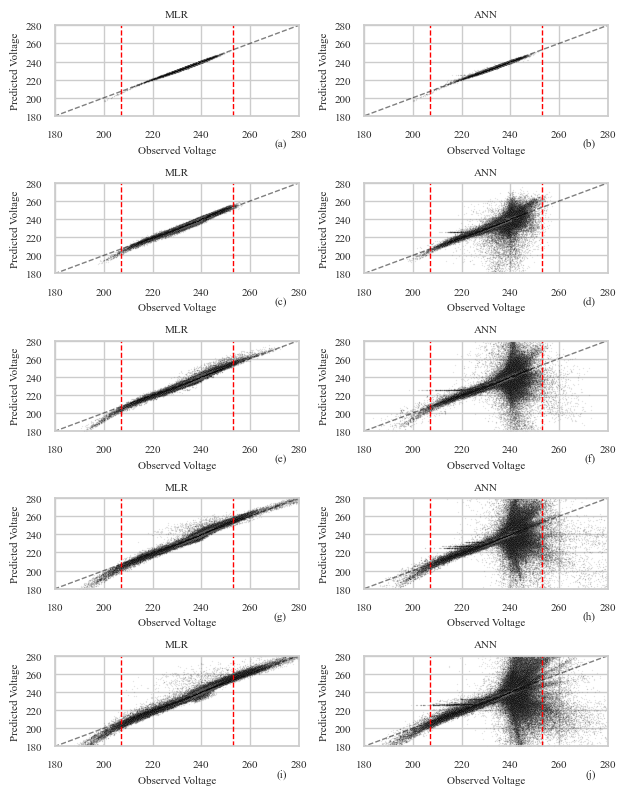

In [23]:
fig, ax = plt.subplots(5,2, figsize = (6.3, 8))

for i in range(5): 
    ax[i][0].axvline(230*1.1, color="red", linestyle="dashed", linewidth=1, alpha=1)
    ax[i][0].axvline(230*0.9, color="red", linestyle="dashed", linewidth=1, alpha=1)
    ax[i][0].set_xlim(180, 280)
    ax[i][0].set_ylim(180, 280)
    ax[i][0].set_xlabel("Observed Voltage", fontsize = 8)
    ax[i][0].set_ylabel("Predicted Voltage", fontsize = 8)
    
    ax[i][1].axvline(230*1.1, color="red", linestyle="dashed", linewidth=1, alpha=1)
    ax[i][1].axvline(230*0.9, color="red", linestyle="dashed", linewidth=1, alpha=1)
    ax[i][1].set_xlim(180, 280)
    ax[i][1].set_ylim(180, 280)
    ax[i][1].set_xlabel("Observed Voltage", fontsize = 8)
    ax[i][1].set_ylabel("Predicted Voltage", fontsize = 8)
    
    #ax[i][0].legend(loc = 'upper left', fontsize = 8)
    #ax[i][1].legend(loc = 'upper left', fontsize = 8)
    
    sns.lineplot(ax = ax[i][0], x = [0,500], y = [0,500], color = "black", linewidth=1, linestyle = "dashed", alpha = 0.5)
    sns.lineplot(ax = ax[i][1], x = [0,500], y = [0,500], color = "black", linewidth=1, linestyle = "dashed", alpha = 0.5)
    
    fig_range = [180,200,220,240,260,280]
    ax[i][0].set_xticks(fig_range, fig_range, fontsize=8)
    ax[i][0].set_yticks(fig_range, fig_range, fontsize=8)
    ax[i][1].set_xticks(fig_range, fig_range, fontsize=8)
    ax[i][1].set_yticks(fig_range, fig_range, fontsize=8)

    
    
for i in range(128):
    if i == 63:
        continue
    sns.scatterplot(ax = ax[0][0], x = data_list[i]["Observed_10"],y = data_list[i]["Predicted_10"], alpha = 0.1, color = "black", s = 1)
    sns.scatterplot(ax = ax[0][1], x = data_list_nn[i]["Observed_10"],y = data_list_nn[i]["Predicted_10"], alpha = 0.1, color = "black", s = 1)
    
    sns.scatterplot(ax = ax[1][0], x = data_list[i]["Observed_30"],y = data_list[i]["Predicted_30"], alpha = 0.1, color = "black", s = 1)
    sns.scatterplot(ax = ax[1][1], x = data_list_nn[i]["Observed_30"],y = data_list_nn[i]["Predicted_30"], alpha = 0.1, color = "black", s = 1)
    
    sns.scatterplot(ax = ax[2][0], x = data_list[i]["Observed_50"],y = data_list[i]["Predicted_50"], alpha = 0.1, color = "black", s = 1)
    sns.scatterplot(ax = ax[2][1], x = data_list_nn[i]["Observed_50"],y = data_list_nn[i]["Predicted_50"], alpha = 0.1, color = "black", s = 1)
    
    sns.scatterplot(ax = ax[3][0], x = data_list[i]["Observed_70"],y = data_list[i]["Predicted_70"], alpha = 0.1, color = "black", s = 1)
    sns.scatterplot(ax = ax[3][1], x = data_list_nn[i]["Observed_70"],y = data_list_nn[i]["Predicted_70"], alpha = 0.1, color = "black", s = 1)
    
    sns.scatterplot(ax = ax[4][0], x = data_list[i]["Observed_100"],y = data_list[i]["Predicted_100"], alpha = 0.1, color = "black", s = 1)
    sns.scatterplot(ax = ax[4][1], x = data_list_nn[i]["Observed_100"],y = data_list_nn[i]["Predicted_100"], alpha = 0.1, color = "black", s = 1)
    

ax[0][0].set_title("MLR", fontsize = 8)
ax[0][1].set_title("ANN", fontsize = 8)
ax[1][0].set_title("MLR", fontsize = 8)
ax[1][1].set_title("ANN", fontsize = 8)
ax[2][0].set_title("MLR", fontsize = 8)
ax[2][1].set_title("ANN", fontsize = 8)
ax[3][0].set_title("MLR", fontsize = 8)
ax[3][1].set_title("ANN", fontsize = 8)
ax[4][0].set_title("MLR", fontsize = 8)
ax[4][1].set_title("ANN", fontsize = 8)

ax[0][0].text(0.95, -0.3, '(a)', va='center', ha='right', transform=ax[0][0].transAxes, fontsize=8)
ax[0][1].text(0.95, -0.3, '(b)', va='center', ha='right', transform=ax[0][1].transAxes, fontsize=8)

ax[1][0].text(0.95, -0.3, '(c)', va='center', ha='right', transform=ax[1][0].transAxes, fontsize=8)
ax[1][1].text(0.95, -0.3, '(d)', va='center', ha='right', transform=ax[1][1].transAxes, fontsize=8)

ax[2][0].text(0.95, -0.3, '(e)', va='center', ha='right', transform=ax[2][0].transAxes, fontsize=8)
ax[2][1].text(0.95, -0.3, '(f)', va='center', ha='right', transform=ax[2][1].transAxes, fontsize=8)

ax[3][0].text(0.95, -0.3, '(g)', va='center', ha='right', transform=ax[3][0].transAxes, fontsize=8)
ax[3][1].text(0.95, -0.3, '(h)', va='center', ha='right', transform=ax[3][1].transAxes, fontsize=8)

ax[4][0].text(0.95, -0.3, '(i)', va='center', ha='right', transform=ax[4][0].transAxes, fontsize=8)
ax[4][1].text(0.95, -0.3, '(j)', va='center', ha='right', transform=ax[4][1].transAxes, fontsize=8)

plt.tight_layout()
plt.savefig("Images/performance.png", dpi=600)

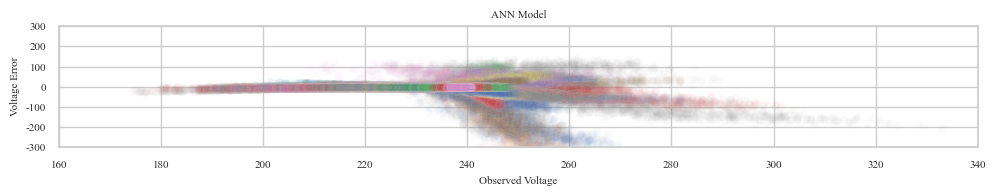

In [24]:
fig, ax = plt.subplots(figsize = (10,2))
for i in range(128):
    if i == 63:
        continue
    sns.scatterplot(x = data_list_nn[i]["Observed_100"],y = data_list_nn[i]["Error_100"], alpha = 0.03)
#sns.lineplot(x = [0,500], y = [0,500], color = "black", linestyle = "dashed", alpha = 0.5)
#plt.xlim(140, 350)
#plt.ylim(140, 350)
plt.title("ANN Model", fontsize=8)
plt.xlabel("Observed Voltage", fontsize=8)
plt.ylabel("Voltage Error", fontsize=8)
plt.xlim(160,340)
plt.ylim(-300,300)
plt.xticks(np.arange(160,350,20),np.arange(160,350,20), fontsize=8)
plt.yticks(np.arange(-300,310,100),np.arange(-300,310,100), fontsize=8)
plt.tight_layout()
plt.savefig("Images/nn_error_observed.png", dpi=600)

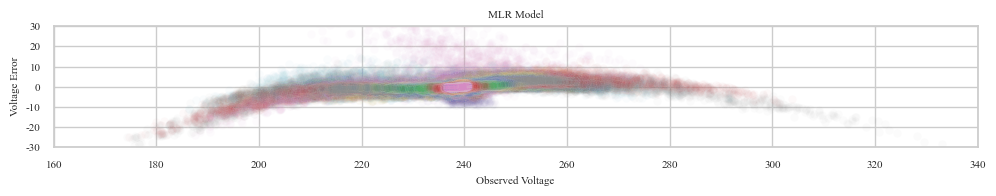

In [25]:
fig, ax = plt.subplots(figsize = (10,2))
for i in range(128):
    if i == 63:
        continue
    sns.scatterplot(x = data_list[i]["Observed_100"],y = data_list[i]["Error_100"], alpha = 0.03)
#sns.lineplot(x = [0,500], y = [0,500], color = "black", linestyle = "dashed", alpha = 0.5)
#plt.xlim(140, 350)
#plt.ylim(140, 350)
plt.title("MLR Model", fontsize=8)
plt.xlabel("Observed Voltage", fontsize=8)
plt.ylabel("Voltage Error", fontsize=8)
plt.ylim(-30,30)
plt.xlim(160,340)
plt.xticks(np.arange(160,350,20),np.arange(160,350,20), fontsize=8)
plt.yticks(np.arange(-30,31,10),np.arange(-30,31,10), fontsize=8)
plt.tight_layout()
plt.savefig("Images/mlr_error_observed.png", dpi=600)

# Network violations

## NN Model

In [26]:
#count overvoltage
#gen 2 dataframes, Percent by violations

obs_viol_nn_df = pd.DataFrame()
for name in ["Observed_10","Observed_30","Observed_50","Observed_70", "Observed_100","Predicted_10","Predicted_30","Predicted_50","Predicted_70", "Predicted_100"]:
    Upper = []
    Lower = []
    for i in range(128):
        if i == 63:
            continue
        upper_violation_count = 0
        lower_violation_count = 0
        for data in data_list_nn[i][name]:
            if data > 230 + 23:
                upper_violation_count += 1
            if data < 230-23:
                lower_violation_count += 1
        Upper.append(upper_violation_count)
        Lower.append(lower_violation_count)
    obs_viol_nn_df[name + " Upper"] = Upper
    obs_viol_nn_df[name + " Lower"] = Lower


In [27]:
df = pd.DataFrame([[0,6,12,26,35],[0,16,22,31,41],[1,6,10,16,22],[1,11,17,25,33]], columns = ["10%","30%", "50%","70%","100%"])
custom_index = ["Observed Upper","Predicted Upper","Observed Lower", "Predicted Lower"]
df.index = custom_index


In [28]:
obs_viol_nn_df = obs_viol_nn_df.rename(index=dict(zip(range(0,128), Feed_names[:62] + Feed_names[63:])))

In [29]:
obs_viol_nn_df.head()

,Observed_10 Upper,Observed_10 Lower,Observed_30 Upper,Observed_30 Lower,Observed_50 Upper,Observed_50 Lower,Observed_70 Upper,Observed_70 Lower,Observed_100 Upper,Observed_100 Lower,Predicted_10 Upper,Predicted_10 Lower,Predicted_30 Upper,Predicted_30 Lower,Predicted_50 Upper,Predicted_50 Lower,Predicted_70 Upper,Predicted_70 Lower,Predicted_100 Upper,Predicted_100 Lower
1 1,0,0,0,0,0,0,0,0,78,0,0,0,6,0,283,0,115,0,802,1
1 2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1 3,0,0,0,2,0,0,31,0,91,0,0,0,0,2,313,0,580,0,803,1
1 4,0,0,0,0,98,2,288,22,431,49,0,0,0,0,0,7,0,197,0,288
2 1,0,0,0,0,0,0,0,0,217,3,0,0,46,0,418,0,686,1,1036,12


### Observed voltage violations (upper and lower)

/tmp/ipykernel_100237/722778848.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90, fontsize=4);
/tmp/ipykernel_100237/722778848.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8);
/tmp/ipykernel_100237/722778848.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-90, fontsize=4);
/tmp/ipykernel_100237/722778848.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8);


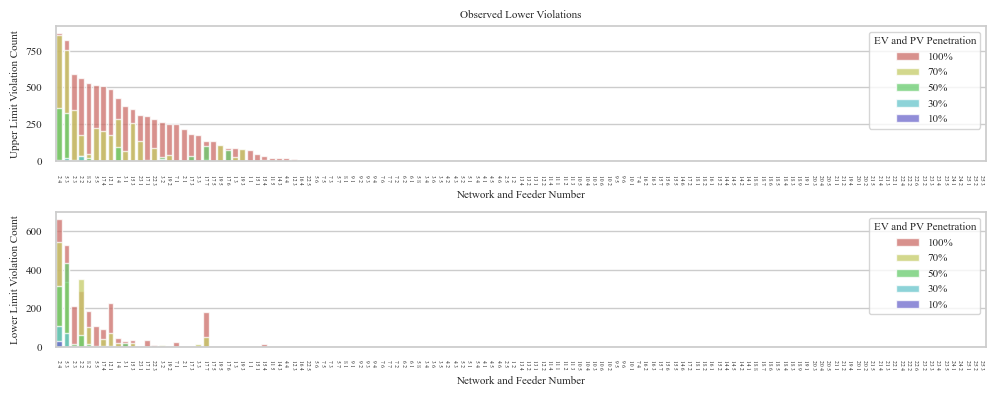

In [30]:
obs_viol_nn_df = obs_viol_nn_df.sort_values(by='Observed_100 Upper', ascending=False)
fig, ax = plt.subplots(2,1, figsize = (10,4))
c = sns.color_palette("hls")

sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Observed_100 Upper", x = obs_viol_nn_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Observed_70 Upper", x = obs_viol_nn_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Observed_50 Upper", x = obs_viol_nn_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Observed_30 Upper", x = obs_viol_nn_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Observed_10 Upper", x = obs_viol_nn_df.index, color =  c[4], alpha = 0.75, label = "10%")


sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Observed_100 Lower", x = obs_viol_nn_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Observed_70 Lower", x = obs_viol_nn_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Observed_50 Lower", x = obs_viol_nn_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Observed_30 Lower", x = obs_viol_nn_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Observed_10 Lower", x = obs_viol_nn_df.index, color =  c[4], alpha = 0.75, label = "10%")

ax[0].set_title("Observed Upper Violations", fontsize=8)
ax[0].set_ylabel("Upper Limit Violation Count", fontsize=8)
ax[0].set_xlabel("Network and Feeder Number", fontsize=8)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90, fontsize=4); 
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8); 
leg0 = ax[0].legend(title = "EV and PV Penetration", fontsize=8)
leg0.get_title().set_fontsize('8')

ax[0].set_title("Observed Lower Violations", fontsize=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-90, fontsize=4);
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8);
ax[1].set_ylabel("Lower Limit Violation Count", fontsize=8)
ax[1].set_xlabel("Network and Feeder Number", fontsize=8)
leg1 = ax[1].legend(title = "EV and PV Penetration", fontsize=8)
leg1.get_title().set_fontsize('8')

plt.tight_layout()
plt.savefig("Images/observed_v_violations.svg")

### Predicted voltage violations (upper and lower)

/tmp/ipykernel_100237/2212875423.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90, fontsize=4);
/tmp/ipykernel_100237/2212875423.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8); \
/tmp/ipykernel_100237/2212875423.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-90, fontsize=4);
/tmp/ipykernel_100237/2212875423.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8);


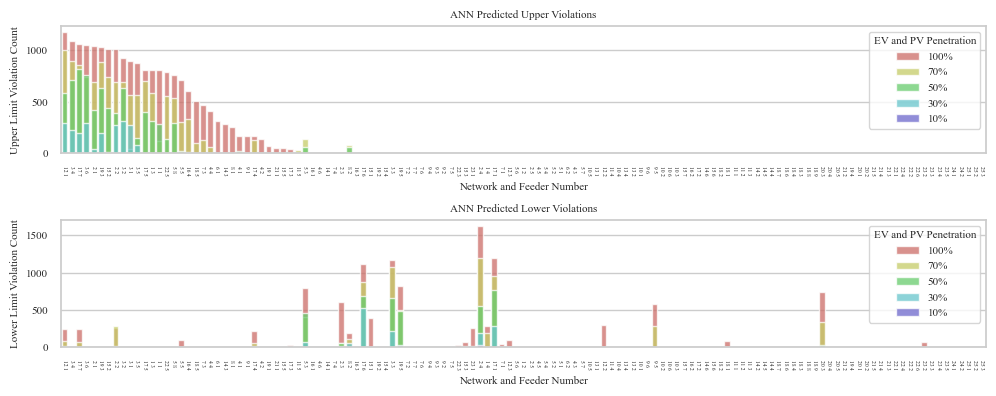

In [31]:
obs_viol_nn_df = obs_viol_nn_df.sort_values(by='Predicted_100 Upper', ascending=False)
fig, ax = plt.subplots(2,1, figsize = (10,4))

c = sns.color_palette("hls")
sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Predicted_100 Upper", x = obs_viol_nn_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Predicted_70 Upper", x = obs_viol_nn_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Predicted_50 Upper", x = obs_viol_nn_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Predicted_30 Upper", x = obs_viol_nn_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Predicted_10 Upper", x = obs_viol_nn_df.index, color =  c[4], alpha = 0.75, label = "10%")


sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Predicted_100 Lower", x = obs_viol_nn_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Predicted_70 Lower", x = obs_viol_nn_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Predicted_50 Lower", x = obs_viol_nn_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Predicted_30 Lower", x = obs_viol_nn_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Predicted_10 Lower", x = obs_viol_nn_df.index, color =  c[4], alpha = 0.75, label = "10%")

ax[0].set_title("ANN Predicted Upper Violations", fontsize = 8)
ax[0].set_ylabel("Upper Limit Violation Count", fontsize=8)
ax[0].set_xlabel("Network and Feeder Number", fontsize=8)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90, fontsize=4); 
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8); \
leg0 = ax[0].legend(title = "EV and PV Penetration", fontsize=8, loc = "upper right")
leg0.get_title().set_fontsize('8')

ax[1].set_title("ANN Predicted Lower Violations", fontsize = 8)
ax[1].set_ylabel("Lower Limit Violation Count", fontsize=8)
ax[1].set_xlabel("Network and Feeder Number", fontsize=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-90, fontsize=4);
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8);
leg1 = ax[1].legend(title = "EV and PV Penetration", fontsize=8, loc = "upper right")
leg1.get_title().set_fontsize('8')

plt.tight_layout()
plt.savefig("Images/nn_predicted_v_violations.svg")

### Observed vs predicted upper voltage violations

/tmp/ipykernel_100237/892976504.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90, fontsize=4);
/tmp/ipykernel_100237/892976504.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8); \
/tmp/ipykernel_100237/892976504.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-90, fontsize=4);
/tmp/ipykernel_100237/892976504.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8);


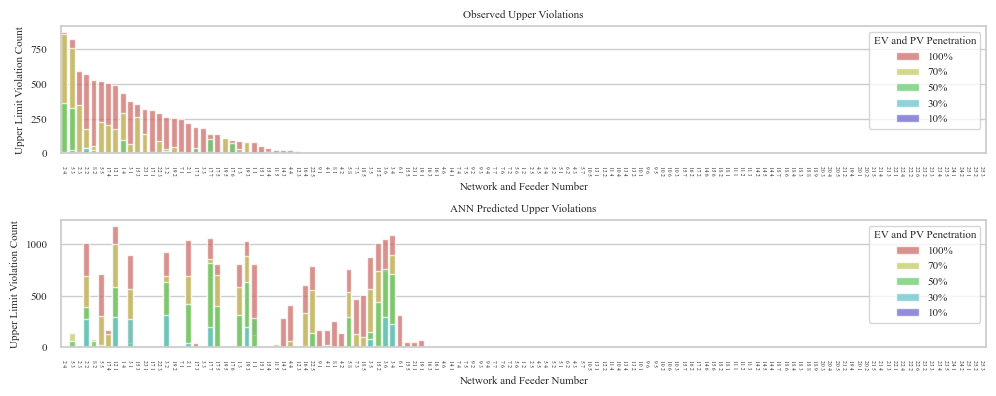

In [32]:
obs_viol_nn_df = obs_viol_nn_df.sort_values(by='Observed_100 Upper', ascending=False)
fig, ax = plt.subplots(2,1, figsize = (10,4))

c = sns.color_palette("hls")
sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Observed_100 Upper", x = obs_viol_nn_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Observed_70 Upper", x = obs_viol_nn_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Observed_50 Upper", x = obs_viol_nn_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Observed_30 Upper", x = obs_viol_nn_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Observed_10 Upper", x = obs_viol_nn_df.index, color =  c[4], alpha = 0.75, label = "10%")


sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Predicted_100 Upper", x = obs_viol_nn_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Predicted_70 Upper", x = obs_viol_nn_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Predicted_50 Upper", x = obs_viol_nn_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Predicted_30 Upper", x = obs_viol_nn_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Predicted_10 Upper", x = obs_viol_nn_df.index, color =  c[4], alpha = 0.75, label = "10%")

ax[0].set_title("Observed Upper Violations", fontsize = 8)
ax[0].set_ylabel("Upper Limit Violation Count", fontsize=8)
ax[0].set_xlabel("Network and Feeder Number", fontsize=8)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90, fontsize=4); 
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8); \
leg0 = ax[0].legend(title = "EV and PV Penetration", fontsize=8, loc = "upper right")
leg0.get_title().set_fontsize('8')

ax[1].set_title("ANN Predicted Upper Violations", fontsize = 8)
ax[1].set_ylabel("Upper Limit Violation Count", fontsize=8)
ax[1].set_xlabel("Network and Feeder Number", fontsize=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-90, fontsize=4);
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8);
leg1 = ax[1].legend(title = "EV and PV Penetration", fontsize=8, loc = "upper right")
leg1.get_title().set_fontsize('8')

plt.tight_layout()
plt.savefig("Images/nn_observed_predicted_upper_v_violations.svg")

### Observed vs predicted lower voltage violations

/tmp/ipykernel_100237/699238204.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90, fontsize=4);
/tmp/ipykernel_100237/699238204.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8); \
/tmp/ipykernel_100237/699238204.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-90, fontsize=4);
/tmp/ipykernel_100237/699238204.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8);


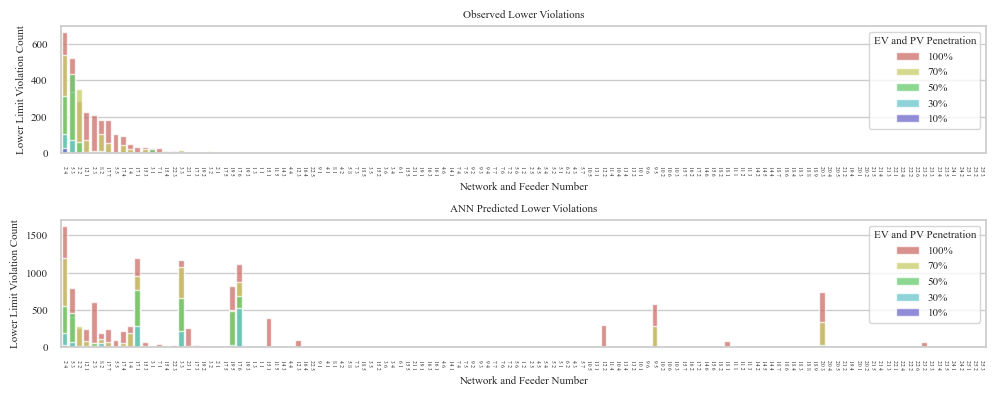

In [33]:
obs_viol_nn_df = obs_viol_nn_df.sort_values(by='Observed_100 Lower', ascending=False)
fig, ax = plt.subplots(2,1, figsize = (10,4))

c = sns.color_palette("hls")
sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Observed_100 Lower", x = obs_viol_nn_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Observed_70 Lower", x = obs_viol_nn_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Observed_50 Lower", x = obs_viol_nn_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Observed_30 Lower", x = obs_viol_nn_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[0], data = obs_viol_nn_df, y = "Observed_10 Lower", x = obs_viol_nn_df.index, color =  c[4], alpha = 0.75, label = "10%")


sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Predicted_100 Lower", x = obs_viol_nn_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Predicted_70 Lower", x = obs_viol_nn_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Predicted_50 Lower", x = obs_viol_nn_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Predicted_30 Lower", x = obs_viol_nn_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[1], data = obs_viol_nn_df, y = "Predicted_10 Lower", x = obs_viol_nn_df.index, color =  c[4], alpha = 0.75, label = "10%")

ax[0].set_title("Observed Lower Violations", fontsize = 8)
ax[0].set_ylabel("Lower Limit Violation Count", fontsize=8)
ax[0].set_xlabel("Network and Feeder Number", fontsize=8)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90, fontsize=4); 
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8); \
leg0 = ax[0].legend(title = "EV and PV Penetration", fontsize=8, loc = "upper right")
leg0.get_title().set_fontsize('8')

ax[1].set_title("ANN Predicted Lower Violations", fontsize = 8)
ax[1].set_ylabel("Lower Limit Violation Count", fontsize=8)
ax[1].set_xlabel("Network and Feeder Number", fontsize=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-90, fontsize=4);
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8);
leg1 = ax[1].legend(title = "EV and PV Penetration", fontsize=8, loc = "upper right")
leg1.get_title().set_fontsize('8')

plt.tight_layout()
plt.savefig("Images/nn_observed_predicted_lower_v_violations.svg")

## MLR Model

In [34]:
#count overvoltage
#gen 2 dataframes, Percent by violations

obs_viol_df = pd.DataFrame()
for name in ["Observed_10","Observed_30","Observed_50","Observed_70", "Observed_100","Predicted_10","Predicted_30","Predicted_50","Predicted_70", "Predicted_100"]:
    Upper = []
    Lower = []
    for i in range(128):
        if i == 63:
            continue
        upper_violation_count = 0
        lower_violation_count = 0
        for data in data_list[i][name]:
            if data > 230 + 23:
                upper_violation_count += 1
            if data < 230-23:
                lower_violation_count += 1
        Upper.append(upper_violation_count)
        Lower.append(lower_violation_count)
    obs_viol_df[name + " Upper"] = Upper
    obs_viol_df[name + " Lower"] = Lower


In [35]:
df = pd.DataFrame([[0,6,12,26,35],[0,16,22,31,41],[1,6,10,16,22],[1,11,17,25,33]], columns = ["10%","30%", "50%","70%","100%"])
custom_index = ["Observed Upper","Predicted Upper","Observed Lower", "Predicted Lower"]
df.index = custom_index


In [36]:
obs_viol_df = obs_viol_df.rename(index=dict(zip(range(0,128), Feed_names[:62] + Feed_names[63:])))
obs_viol_df = obs_viol_df.sort_values(by='Predicted_100 Upper', ascending=False)

In [37]:
obs_viol_df.head()

,Observed_10 Upper,Observed_10 Lower,Observed_30 Upper,Observed_30 Lower,Observed_50 Upper,Observed_50 Lower,Observed_70 Upper,Observed_70 Lower,Observed_100 Upper,Observed_100 Lower,Predicted_10 Upper,Predicted_10 Lower,Predicted_30 Upper,Predicted_30 Lower,Predicted_50 Upper,Predicted_50 Lower,Predicted_70 Upper,Predicted_70 Lower,Predicted_100 Upper,Predicted_100 Lower
2 4,0,30,8,108,361,315,856,541,870,663,0,37,4,164,467,366,900,648,949,722
5 3,0,0,23,73,326,433,755,338,822,525,0,0,45,116,472,540,848,472,896,618
2 3,0,0,9,8,3,15,349,4,593,212,0,0,95,11,36,26,561,28,732,320
17 4,0,0,0,0,0,4,203,45,509,94,0,0,0,0,0,15,362,70,679,216
2 2,0,0,35,0,37,64,177,353,567,289,0,0,27,0,36,84,345,384,670,333


### Observed voltage violations (upper and lower)

/tmp/ipykernel_100237/3387786648.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90, fontsize=4);
/tmp/ipykernel_100237/3387786648.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8);
/tmp/ipykernel_100237/3387786648.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-90, fontsize=4);
/tmp/ipykernel_100237/3387786648.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8);


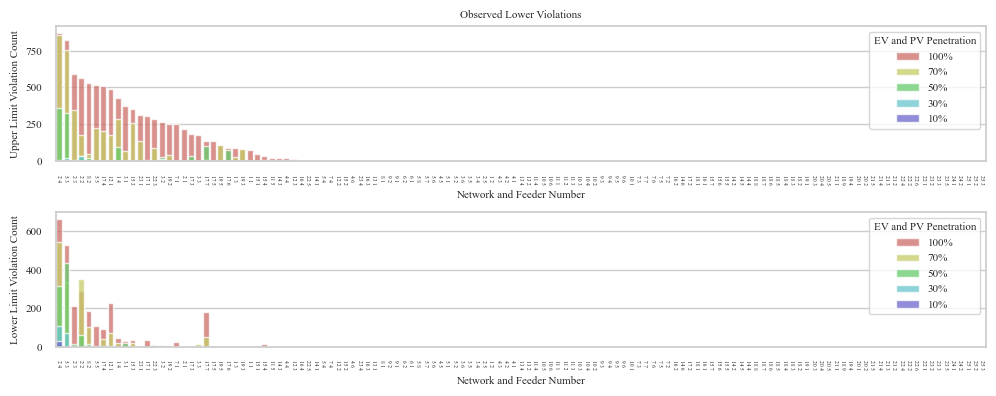

In [38]:
obs_viol_df = obs_viol_df.sort_values(by='Observed_100 Upper', ascending=False)
fig, ax = plt.subplots(2,1, figsize = (10,4))
c = sns.color_palette("hls")

sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_100 Upper", x = obs_viol_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_70 Upper", x = obs_viol_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_50 Upper", x = obs_viol_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_30 Upper", x = obs_viol_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_10 Upper", x = obs_viol_df.index, color =  c[4], alpha = 0.75, label = "10%")


sns.barplot(ax = ax[1], data = obs_viol_df, y = "Observed_100 Lower", x = obs_viol_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Observed_70 Lower", x = obs_viol_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Observed_50 Lower", x = obs_viol_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Observed_30 Lower", x = obs_viol_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Observed_10 Lower", x = obs_viol_df.index, color =  c[4], alpha = 0.75, label = "10%")

ax[0].set_title("Observed Upper Violations", fontsize=8)
ax[0].set_ylabel("Upper Limit Violation Count", fontsize=8)
ax[0].set_xlabel("Network and Feeder Number", fontsize=8)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90, fontsize=4); 
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8); 
leg0 = ax[0].legend(title = "EV and PV Penetration", fontsize=8)
leg0.get_title().set_fontsize('8')

ax[0].set_title("Observed Lower Violations", fontsize=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-90, fontsize=4);
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8);
ax[1].set_ylabel("Lower Limit Violation Count", fontsize=8)
ax[1].set_xlabel("Network and Feeder Number", fontsize=8)
leg1 = ax[1].legend(title = "EV and PV Penetration", fontsize=8)
leg1.get_title().set_fontsize('8')

plt.tight_layout()

### Predicted voltage violations (upper and lower)

/tmp/ipykernel_100237/139428171.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90, fontsize=4);
/tmp/ipykernel_100237/139428171.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8); \
/tmp/ipykernel_100237/139428171.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-90, fontsize=4);
/tmp/ipykernel_100237/139428171.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8);


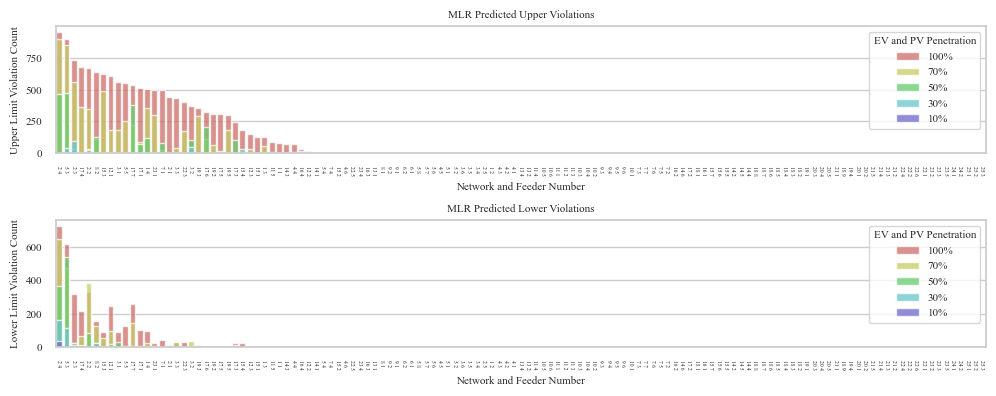

In [39]:
obs_viol_df = obs_viol_df.sort_values(by='Predicted_100 Upper', ascending=False)
fig, ax = plt.subplots(2,1, figsize = (10,4))

c = sns.color_palette("hls")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Predicted_100 Upper", x = obs_viol_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Predicted_70 Upper", x = obs_viol_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Predicted_50 Upper", x = obs_viol_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Predicted_30 Upper", x = obs_viol_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Predicted_10 Upper", x = obs_viol_df.index, color =  c[4], alpha = 0.75, label = "10%")


sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_100 Lower", x = obs_viol_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_70 Lower", x = obs_viol_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_50 Lower", x = obs_viol_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_30 Lower", x = obs_viol_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_10 Lower", x = obs_viol_df.index, color =  c[4], alpha = 0.75, label = "10%")

ax[0].set_title("MLR Predicted Upper Violations", fontsize = 8)
ax[0].set_ylabel("Upper Limit Violation Count", fontsize=8)
ax[0].set_xlabel("Network and Feeder Number", fontsize=8)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90, fontsize=4); 
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8); \
leg0 = ax[0].legend(title = "EV and PV Penetration", fontsize=8, loc = "upper right")
leg0.get_title().set_fontsize('8')

ax[1].set_title("MLR Predicted Lower Violations", fontsize = 8)
ax[1].set_ylabel("Lower Limit Violation Count", fontsize=8)
ax[1].set_xlabel("Network and Feeder Number", fontsize=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-90, fontsize=4);
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8);
leg1 = ax[1].legend(title = "EV and PV Penetration", fontsize=8, loc = "upper right")
leg1.get_title().set_fontsize('8')

plt.tight_layout()
plt.savefig("Images/mlr_predicted_v_violations.svg")

### Observed vs predicted upper voltage violations

/tmp/ipykernel_100237/713617364.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90, fontsize=4);
/tmp/ipykernel_100237/713617364.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8); \
/tmp/ipykernel_100237/713617364.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-90, fontsize=4);
/tmp/ipykernel_100237/713617364.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8);


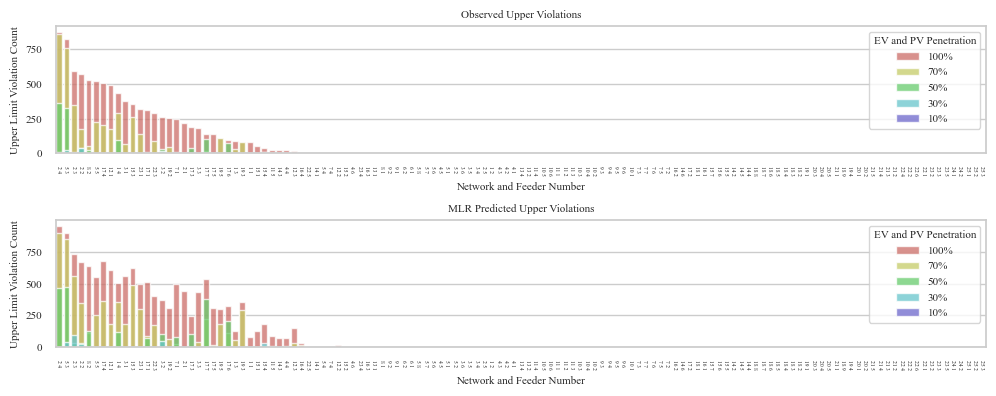

In [40]:
obs_viol_df = obs_viol_df.sort_values(by='Observed_100 Upper', ascending=False)
fig, ax = plt.subplots(2,1, figsize = (10,4))

c = sns.color_palette("hls")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_100 Upper", x = obs_viol_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_70 Upper", x = obs_viol_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_50 Upper", x = obs_viol_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_30 Upper", x = obs_viol_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_10 Upper", x = obs_viol_df.index, color =  c[4], alpha = 0.75, label = "10%")


sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_100 Upper", x = obs_viol_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_70 Upper", x = obs_viol_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_50 Upper", x = obs_viol_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_30 Upper", x = obs_viol_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_10 Upper", x = obs_viol_df.index, color =  c[4], alpha = 0.75, label = "10%")

ax[0].set_title("Observed Upper Violations", fontsize = 8)
ax[0].set_ylabel("Upper Limit Violation Count", fontsize=8)
ax[0].set_xlabel("Network and Feeder Number", fontsize=8)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90, fontsize=4); 
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8); \
leg0 = ax[0].legend(title = "EV and PV Penetration", fontsize=8, loc = "upper right")
leg0.get_title().set_fontsize('8')

ax[1].set_title("MLR Predicted Upper Violations", fontsize = 8)
ax[1].set_ylabel("Upper Limit Violation Count", fontsize=8)
ax[1].set_xlabel("Network and Feeder Number", fontsize=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-90, fontsize=4);
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8);
leg1 = ax[1].legend(title = "EV and PV Penetration", fontsize=8, loc = "upper right")
leg1.get_title().set_fontsize('8')

plt.tight_layout()
plt.savefig("Images/mlr_observed_predicted_upper_v_violations.svg")

### Observed vs predicted lower voltage violations

/tmp/ipykernel_100237/3232318254.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90, fontsize=4);
/tmp/ipykernel_100237/3232318254.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8); \
/tmp/ipykernel_100237/3232318254.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-90, fontsize=4);
/tmp/ipykernel_100237/3232318254.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8);


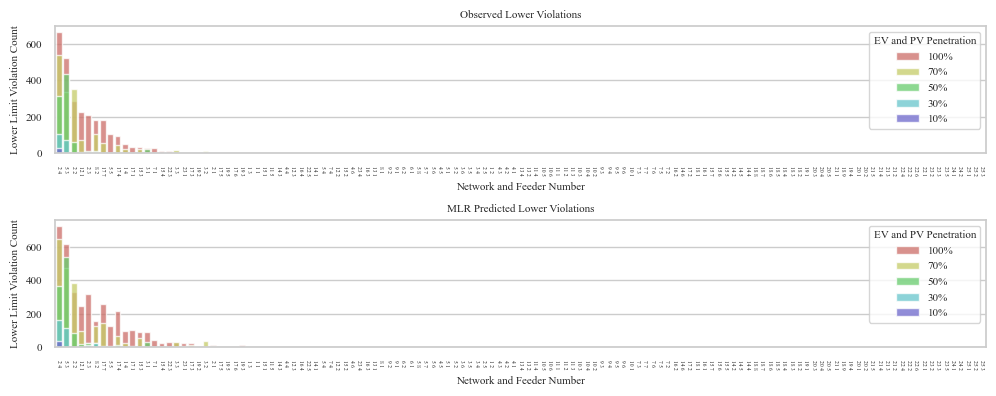

In [41]:
obs_viol_df = obs_viol_df.sort_values(by='Observed_100 Lower', ascending=False)
fig, ax = plt.subplots(2,1, figsize = (10,4))

c = sns.color_palette("hls")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_100 Lower", x = obs_viol_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_70 Lower", x = obs_viol_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_50 Lower", x = obs_viol_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_30 Lower", x = obs_viol_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[0], data = obs_viol_df, y = "Observed_10 Lower", x = obs_viol_df.index, color =  c[4], alpha = 0.75, label = "10%")


sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_100 Lower", x = obs_viol_df.index, color = c[0], alpha = 0.75, label = "100%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_70 Lower", x = obs_viol_df.index, color =  c[1], alpha = 0.75, label = "70%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_50 Lower", x = obs_viol_df.index, color =  c[2], alpha = 0.75, label = "50%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_30 Lower", x = obs_viol_df.index, color =  c[3], alpha = 0.75, label = "30%")
sns.barplot(ax = ax[1], data = obs_viol_df, y = "Predicted_10 Lower", x = obs_viol_df.index, color =  c[4], alpha = 0.75, label = "10%")

ax[0].set_title("Observed Lower Violations", fontsize = 8)
ax[0].set_ylabel("Lower Limit Violation Count", fontsize=8)
ax[0].set_xlabel("Network and Feeder Number", fontsize=8)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=-90, fontsize=4); 
ax[0].set_yticklabels(ax[0].get_yticklabels(), fontsize=8); \
leg0 = ax[0].legend(title = "EV and PV Penetration", fontsize=8, loc = "upper right")
leg0.get_title().set_fontsize('8')

ax[1].set_title("MLR Predicted Lower Violations", fontsize = 8)
ax[1].set_ylabel("Lower Limit Violation Count", fontsize=8)
ax[1].set_xlabel("Network and Feeder Number", fontsize=8)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=-90, fontsize=4);
ax[1].set_yticklabels(ax[1].get_yticklabels(), fontsize=8);
leg1 = ax[1].legend(title = "EV and PV Penetration", fontsize=8, loc = "upper right")
leg1.get_title().set_fontsize('8')

plt.tight_layout()
plt.savefig("Images/mlr_observed_predicted_lower_v_violations.svg")